# Exercise 6

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [559]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [560]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [561]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
515,6.1,0.310,0.26,2.2,0.051,28.0,167.0,0.99260,3.37,0.47,10.4,6,white
5221,10.3,0.590,0.42,2.8,0.090,35.0,73.0,0.99900,3.28,0.70,9.5,6,red
2360,8.1,0.250,0.34,10.1,0.050,30.0,121.0,0.99724,3.17,0.49,10.1,6,white
5453,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red
680,6.7,0.280,0.14,1.4,0.043,64.0,159.0,0.99200,3.17,0.39,10.0,5,white


# Exercise 6.1

Show the frecuency table of the quality by type of wine

In [562]:
data['type'].describe()

count      6497
unique        2
top       white
freq       4898
Name: type, dtype: object

In [563]:
pd.crosstab(index=data['type'],columns=data['quality'])

quality,3,4,5,6,7,8,9
type,,,,,,,
red,10,53,681,638,199,18,0
white,20,163,1457,2198,880,175,5


La tabla muestra la cantidad de cada uno de los tipos de vino, rojo y blanco para cada una de las calidades cuantificadas, que varian entre el 3 y el 9. Para los dos tipos de vino, se evidencia que la mayoria de las observaciones corresponden a vinos de calidad 5 y 6. Dentro de la muestra, se observa que hay más variedad de vinos blancos que rojos, estos últimos que no alcanzan a tener una calidad de 9.

In [564]:
# tabla de contingencia en porcentajes relativos total
my_wines=pd.crosstab(index=data['type'], columns=data['quality'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)
my_wines

quality,3,4,5,6,7,8,9,All
type,,,,,,,,
red,0.153917,0.815761,10.481761,9.819917,3.062952,0.277051,0.000000,24.611359
white,0.307834,2.508850,22.425735,33.830999,13.544713,2.693551,0.076959,75.388641
All,0.461752,3.324611,32.907496,43.650916,16.607665,2.970602,0.076959,100.000000


La tabla de contingencia en porcentajes relativos muestra la frecuencia con la que que es calificado cada una de las observaciones para cada una de las variedades de vino. El 10% de la variedad de vinos rejos es catalogado de calidad 5, mientras que para el caso del vino blanco, el 33% es catalogado de calidad 6.

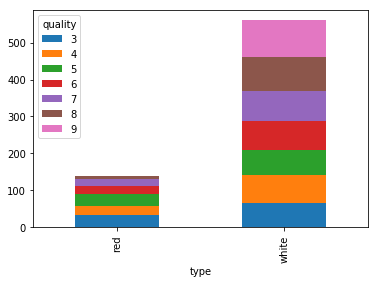

In [565]:
# Gráfico de barras de calidad de vino según el tipo
plot = pd.crosstab(index=data['type'],
            columns=data['quality']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)
plot

El gráfico de barras de calidad de vino según el tipo es mpas visible la relación que hay entre los vinos de variedad roja y variedad blanca. Aproximadamente, las observaciones de variedad de vino blanco triplican las observaciones de vino rojo.

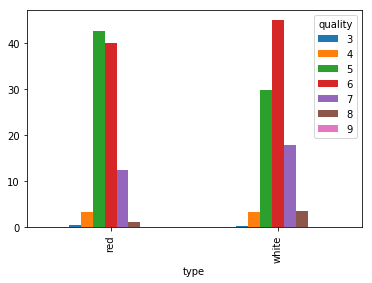

In [566]:
# Gráfico de barras de calidad de vino segun clase
plot = pd.crosstab(index=data['type'],
            columns=data['quality']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
plot

La gráfica de barras de calidad de vino según la clase corresponde a la representación visual de la tabla de frecuencias indicada en la primera parte de este numeral.

In [567]:
#data['datared']=data['type']=='red'
#data['datawhite']=data['type']=='white'
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [568]:
#data['quaity_bool']=np.where(data['quality']>6, 1, 0)

# SVM

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


Estandarización por máximos y mínimos. En este punto se debe realizar la normalización de los datos teniendo en cuenta todas las variables, con excepción de la variable calidad.

Como primera medida, se utiliza la función data.shape que muestra el número de filas y columnas que tiene la base de datos.

In [569]:
row=data.shape[0]
print(row)

6497


In [570]:
col=data.shape[1]
print(col)

13


Con la función iloc se busca ver un valor específico de la tabla, para este caso, se determina el valor máximo y mínimo de la columna 0.

In [571]:
max(data.iloc[:,0])

15.9

In [572]:
min(data.iloc[:,0])

3.8

Para realizar la normalización de los datos se utiliza el método de valores máximos y mínimos y se implementa por medio de un for.

Normalización: 
$$x_{norm}=\frac{x-x_{min} }{x_{max}-x_{min}}$$


In [573]:
for j in range(col-2):
    for i in range(row):
            data.iloc[i,j]=(data.iloc[i,j]-min(data.iloc[:,j]))/(max(data.iloc[:,j])-min(data.iloc[:,j]))
            

In [574]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,6,white
1,0.386014,0.146667,0.204819,0.019723,0.066445,0.047940,0.299398,0.941675,0.812810,0.192853,0.634742,6,white
2,0.501136,0.133333,0.240964,0.104595,0.068106,0.103658,0.219924,0.943101,0.802265,0.166126,0.675326,6,white
3,0.443575,0.100000,0.192771,0.128918,0.081395,0.162491,0.422439,0.943750,0.783809,0.144745,0.661798,6,white
4,0.443575,0.100000,0.192771,0.128918,0.081395,0.162491,0.422439,0.943750,0.783809,0.144745,0.661798,6,white


Se genera una nueva columna llamada "quality_bool" en la que se establece el siguiente criterio: cualquier variedad de vino cuya calidad sea superior a 6 tomará el valor de "1", de lo contrario "0". 

In [575]:
data['quality_bool']=np.where(data['quality']>6, 1, 0)

Se crean targets binarios por cada tipo de vino; se crean dos columnas, una para el tipo de vino blanco y otro para el tipo de vino rojo.

In [576]:
data['redwine']=np.where(data['type']=='red',1,0)
data['whitewine']=np.where(data['type']=='white',1,0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_bool,redwine,whitewine
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,6,white,0,0,1
1,0.386014,0.146667,0.204819,0.019723,0.066445,0.047940,0.299398,0.941675,0.812810,0.192853,0.634742,6,white,0,0,1
2,0.501136,0.133333,0.240964,0.104595,0.068106,0.103658,0.219924,0.943101,0.802265,0.166126,0.675326,6,white,0,0,1
3,0.443575,0.100000,0.192771,0.128918,0.081395,0.162491,0.422439,0.943750,0.783809,0.144745,0.661798,6,white,0,0,1
4,0.443575,0.100000,0.192771,0.128918,0.081395,0.162491,0.422439,0.943750,0.783809,0.144745,0.661798,6,white,0,0,1


# Se crean distintas variables que son la unión de features del tipo de vino

Azucar con la calidad del vino

In [578]:
sugar=np.c_[data['residual sugar'],data['quality']]
#sugar=np.c_[np.ones(data['residual sugar'].shape[0]),data['residual sugar']]

Training

In [579]:
#pos=sugar.shape[0]*0.7
#pos=int(pos)

In [580]:
#Selección del 70% de datos para el train en X
#sugar_train=np.c_[data['residual sugar'][0:pos],data['quality'][0:pos]]
#Selección del 70% de datos para el train en Y
#sugar_test=np.c_[data['residual sugar'][pos:],data['quality'][pos:]]

Alcohol con la calidad del vino

In [581]:
alcohol=np.c_[data['alcohol'],data['quality']]
#Selección del 70% de datos para el train en X
#alcohol_train=np.c_[data['alcohol'][0:pos],data['quality'][0:pos]]
#Selección del 70% de datos para el train en Y
#alcohol_test=np.c_[data['alcohol'][pos:],data['quality'][pos:]]

Se escoge pH

In [582]:
pH=np.c_[data['pH'],data['quality']]
#sugarAlco=np.c_[data['residual sugar'],data['alcohol']]
#Selección del 70% de datos para el train en X
#sugarAlco_train=np.c_[data['residual sugar'][0:pos],data['alcohol'][0:pos]]
#Selección del 70% de datos para el train en Y
#sugarAlco_train=np.c_[data['residual sugar'][pos:],data['alcohol'][pos:]]

Selección training y test del vino

In [583]:
#Selección del 70% de datos para el train en X
redW=data['redwine']
#Selección del 70% de datos para el train en Y
#redW_test=data['redwine'][pos:]
#data['redwine'][0:5]

# Creación de los SVMs

Creación del SVM para azúcar y calidad, para la variedad de vino rojo.

In [584]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf_red = SVC(kernel='linear')
#clf_red.fit( sugar,redW)
clf_red.fit( sugar,data['quality'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Creación SVM para azúcar y alcohol

In [585]:
clf_red1 = SVC(kernel='linear')
clf_red1.fit( pH , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Creación SVM para alcohol  y calidad

In [586]:
clf_red2 = SVC(kernel='linear')
clf_red2.fit( alcohol , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Función que permite graficar los SVMs

In [587]:
import warnings
warnings.filterwarnings('ignore')

In [588]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='r',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

Nota: #data.iloc[:,13] permite seleccionar todas las filas de la columna 13


# La función scatter nos permite comparar la variable x con y, asignandole un color de acuerdo al valor que toma c

Función scatter para la variable x(Azucar, calidad) con c(redwine)

ValueError: setting an array element with a sequence.

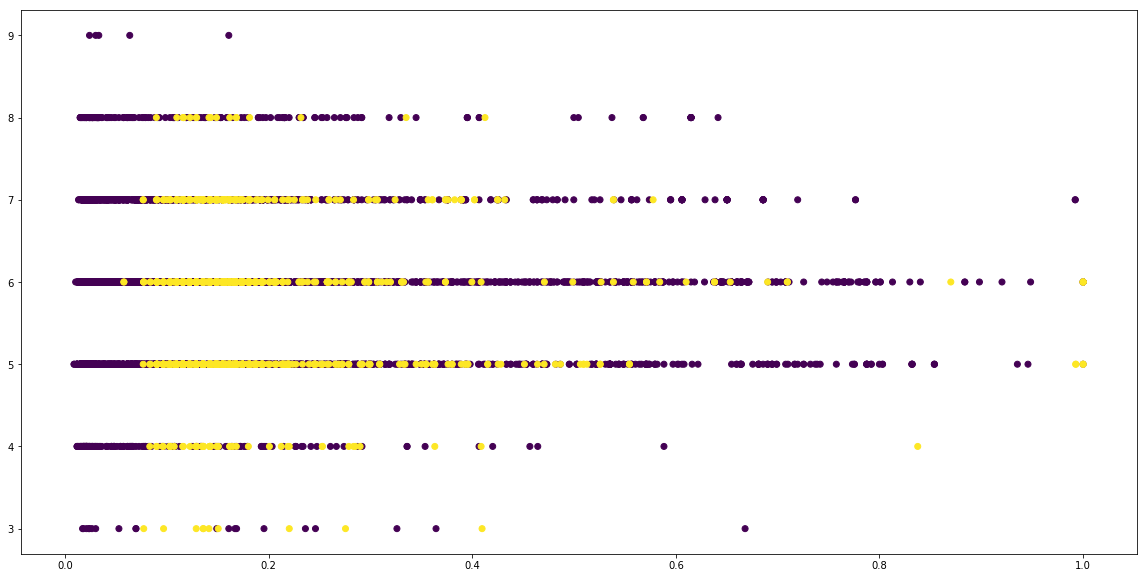

In [590]:
plt.figure(figsize=(20,10))
#plt.scatter(data['redwine'], X_quality, c=y,s=50)
plt.scatter(sugar[:,0], sugar[:,1],c=data.iloc[:,14])
plot_svc_decision_function(clf_red)

Función scatter para la variable x(Azucar, alcohol) con c(redwine)

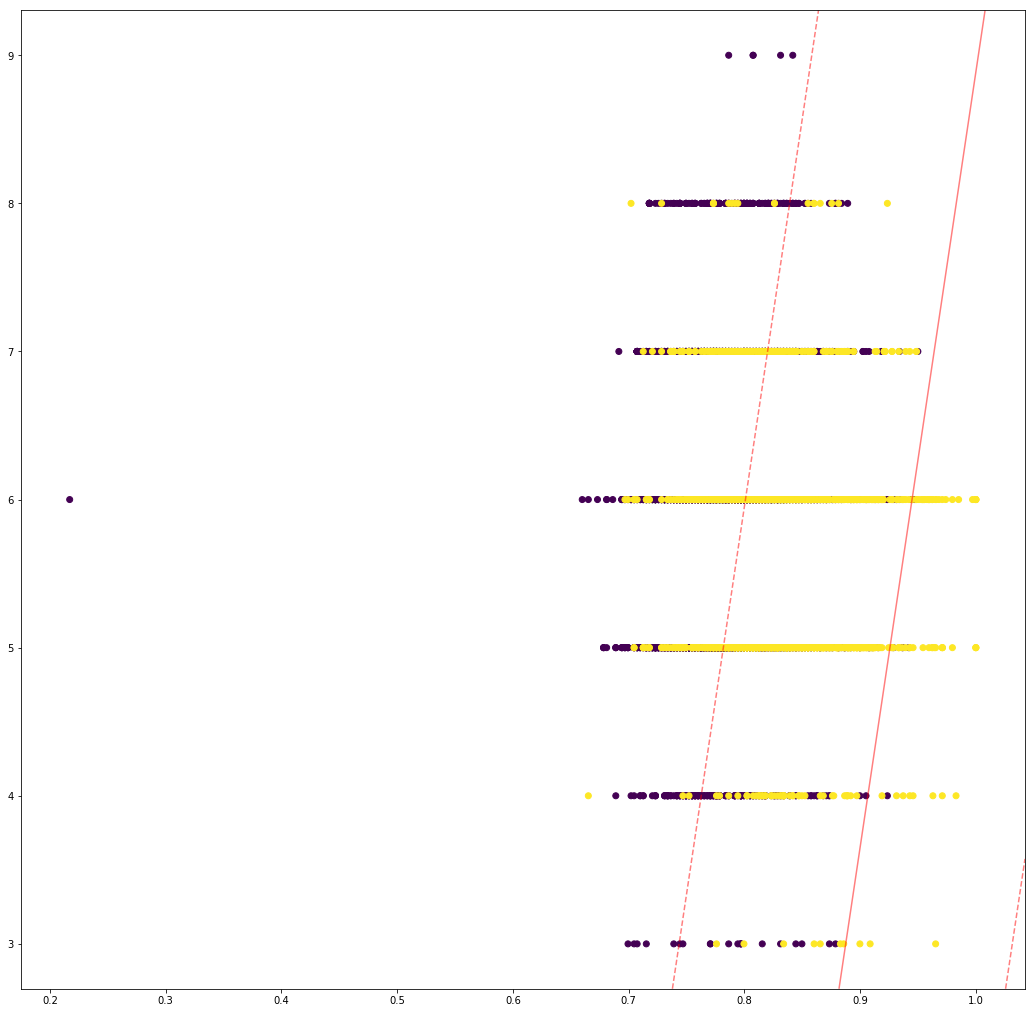

In [591]:
plt.figure(figsize=(18,18))
plt.scatter(sugarAlco[:,0], sugarAlco[:,1],c=data.iloc[:,14])
plot_svc_decision_function(clf_red1)

# Función scatter para la variable x(alcohol, calidad) con c(redwine)

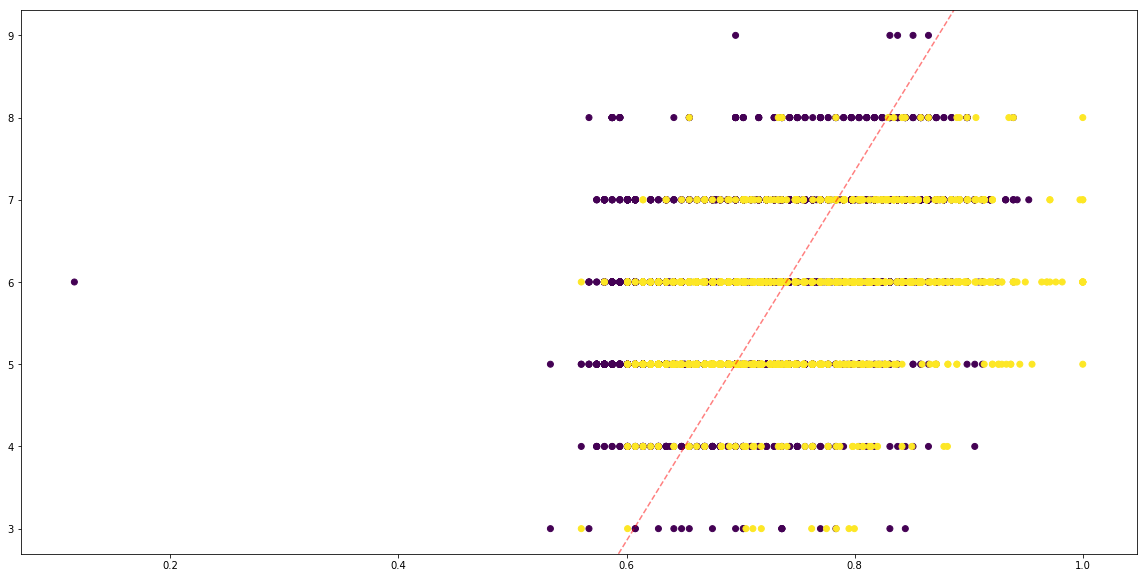

In [592]:
plt.figure(figsize=(20,10))
plt.scatter(alcohol[:,0], alcohol[:,1],c=data.iloc[:,14])
plot_svc_decision_function(clf_red2)

# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


Se realiza la prueba con poly

In [593]:
clf_redP = SVC(kernel='poly')
clf_redP.fit( sugar , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [594]:
clf_red1P = SVC(kernel='poly')
clf_red1P.fit( pH , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [595]:
clf_red2P = SVC(kernel='poly')
clf_red2P.fit( alcohol , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

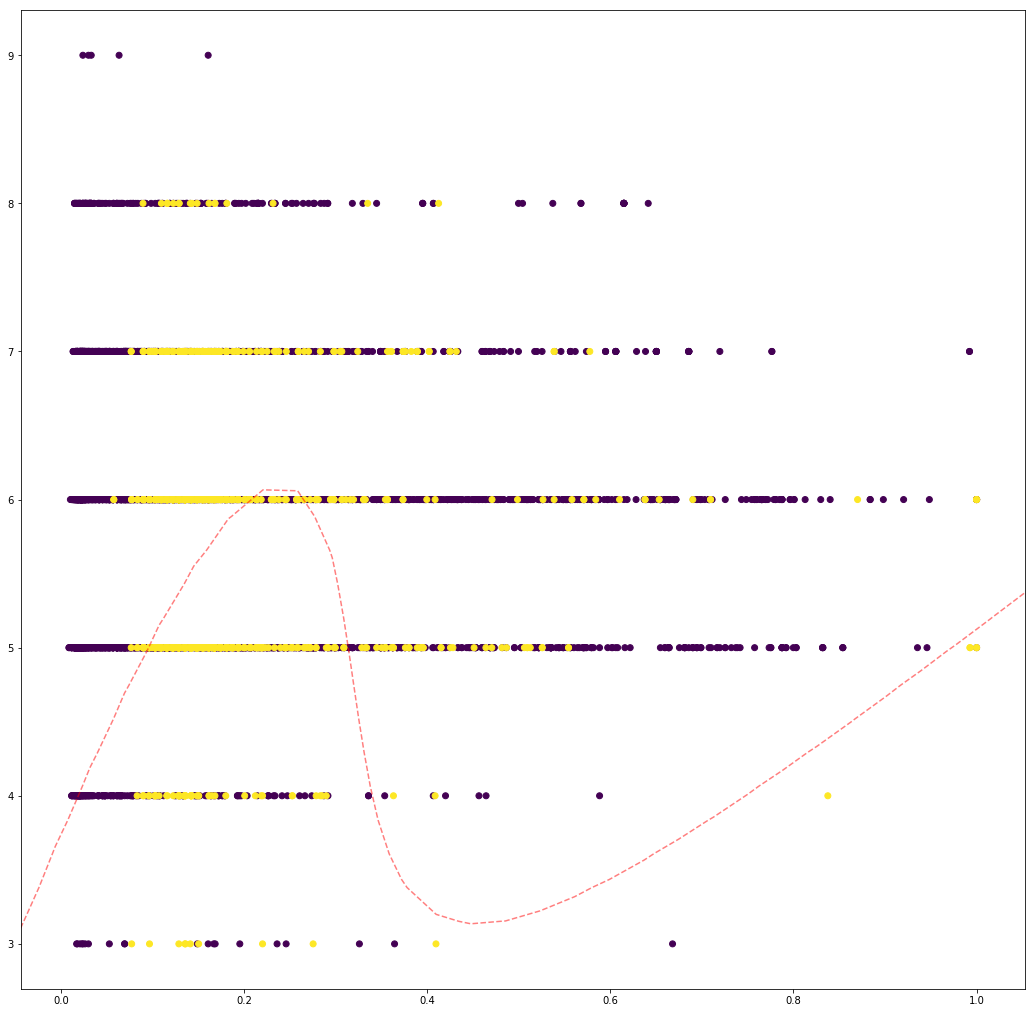

In [596]:
plt.figure(figsize=(18,18))
plt.scatter(sugar[:,0], sugar[:,1],c=data.iloc[:,14])
plot_svc_decision_function(clf_redP)

Se realiza la prueba con rbf

In [597]:
clf_redR = SVC(kernel='rbf')
clf_redR.fit( sugar , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [598]:
clf_red1R = SVC(kernel='rbf')
clf_red1R.fit( pH , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [599]:
clf_red2R = SVC(kernel='rbf')
clf_red2R.fit( alcohol , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Grafica 1

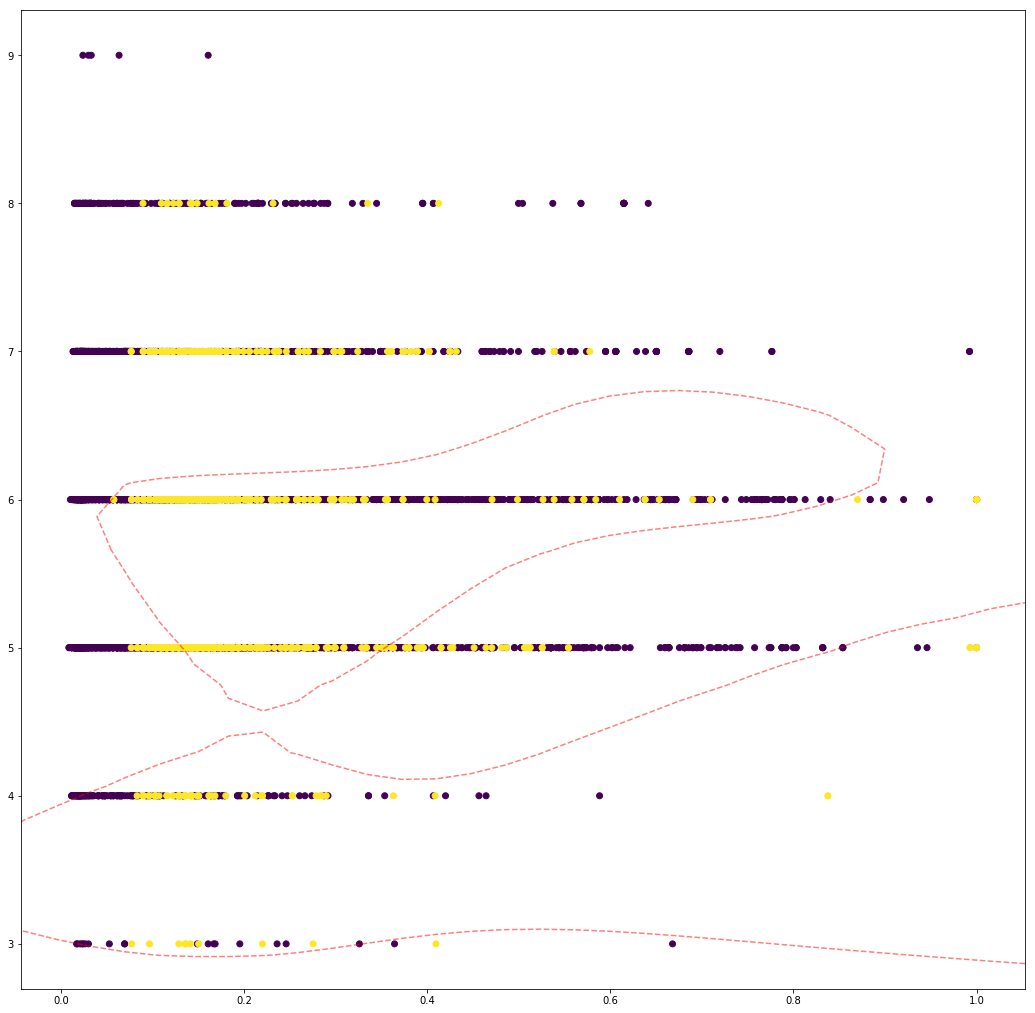

In [600]:
plt.figure(figsize=(18,18))
#plt.scatter(data['redwine'], X_quality, c=y,s=50)
plt.scatter(sugar[:,0], sugar[:,1],c=data.iloc[:,14])
plot_svc_decision_function(clf_redR)

Grafica 2

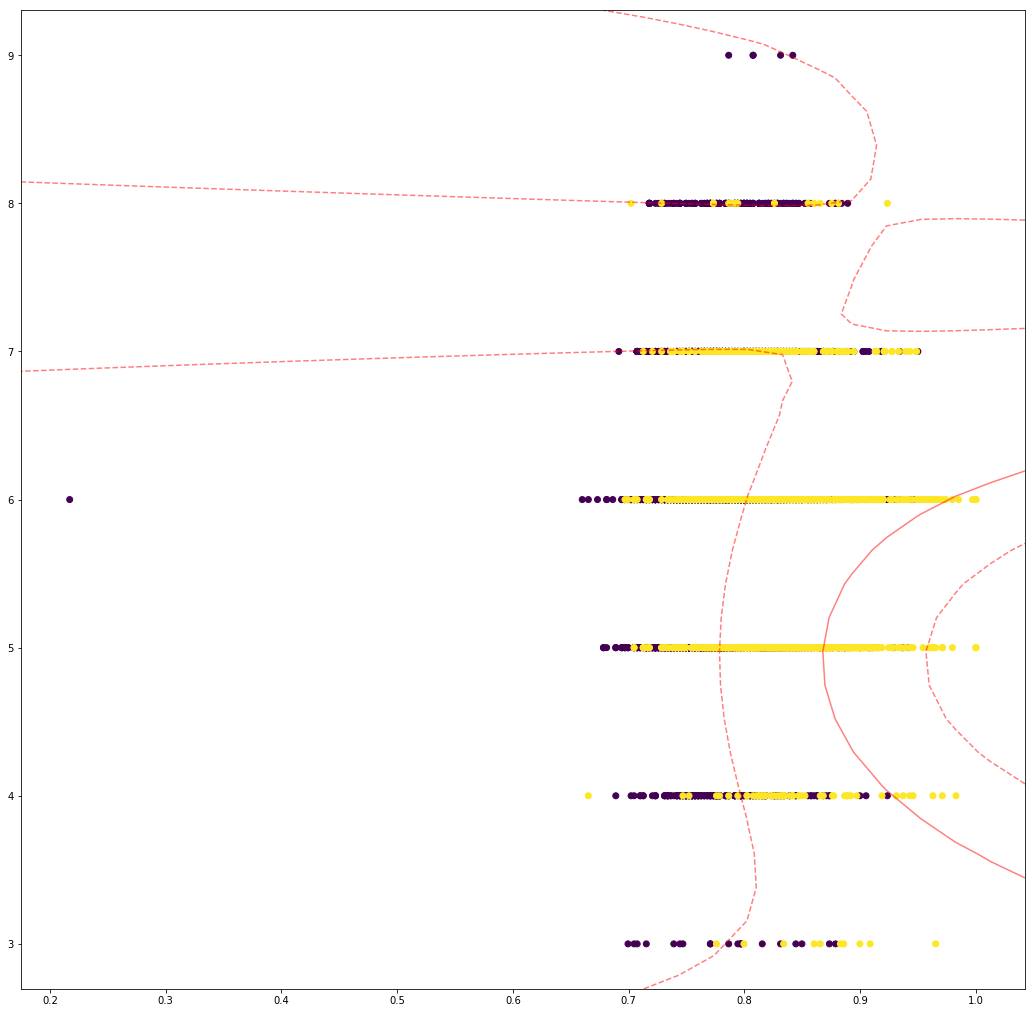

In [601]:
plt.figure(figsize=(18,18))
#plt.scatter(data['redwine'], X_quality, c=y,s=50)
plt.scatter(pH[:,0], pH[:,1],c=data.iloc[:,14])
plot_svc_decision_function(clf_red1R)

Se realiza la prueba con sigmoid

In [602]:
clf_redS = SVC(kernel='sigmoid')
clf_redS.fit( sugar , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [603]:
clf_red1S = SVC(kernel='sigmoid')
clf_red1S.fit( sugarAlco , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [604]:
clf_red2S = SVC(kernel='sigmoid')
clf_red2S.fit( alcohol , data['redwine'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Gráficas

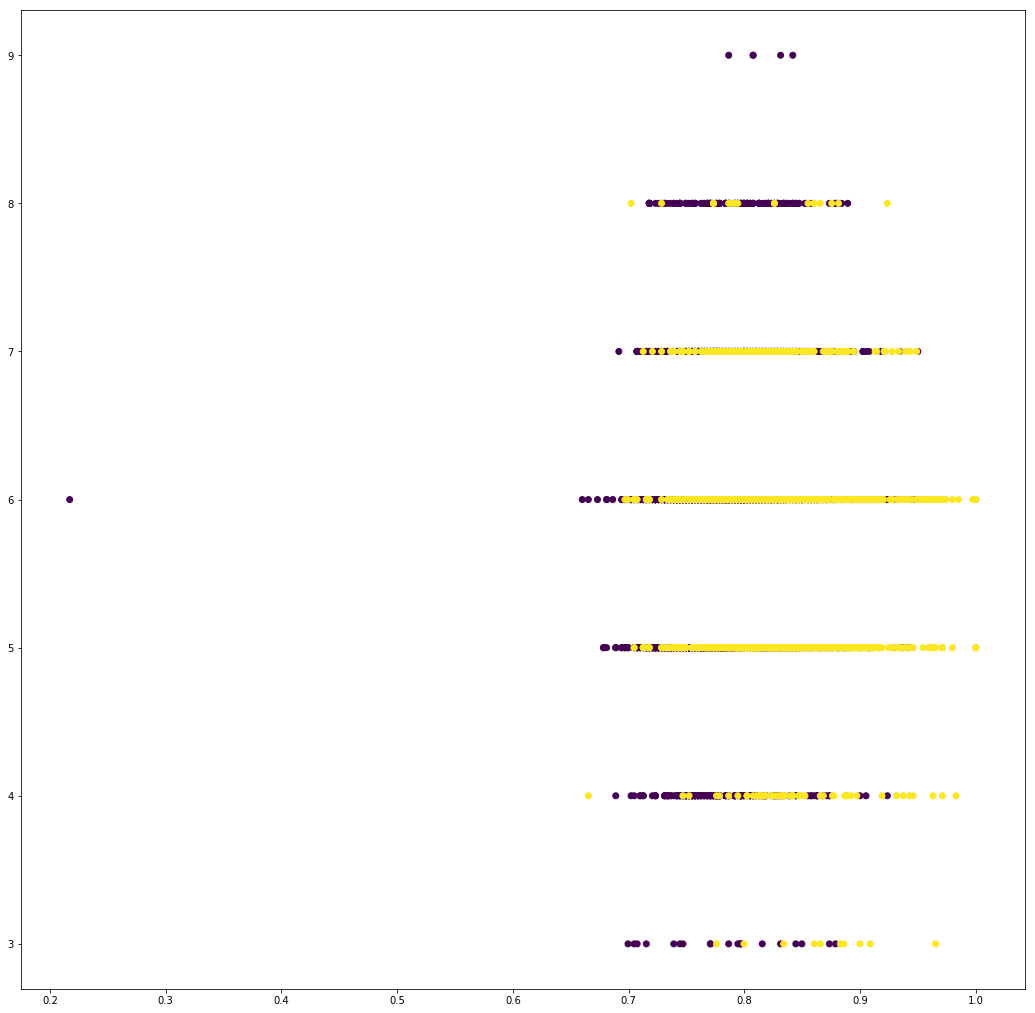

In [605]:
plt.figure(figsize=(18,18))
plt.scatter(sugarAlco[:,0], sugarAlco[:,1],c=data.iloc[:,14])
plot_svc_decision_function(clf_red1S)

## Se calcula el Accuracy para cada uno de los SVMs (pH, azúcar y alcohol) usando el método score

In [606]:
acc=np.empty(12)

### Accuracy para el pH según cada una de los kernel.

In [607]:
acc[0]=clf_red1.score( pH , data['redwine'])
acc[1]=clf_red1S.score( pH , data['redwine'])
acc[2]=clf_red1R.score( pH , data['redwine'])
acc[3]=clf_red1P.score( pH , data['redwine'])
print(acc[0], acc[1], acc[2], acc[3])

0.7632753578574727 0.7538864091118977 0.7738956441434508 0.7882099430506387


De acuerdo a los resultaos obtenidos para la variable pH, el kernel más alto corresponde a la función polinómica.

### Accuracy para el Azúcar según cada una de los kernel

In [608]:
acc[4]=clf_red.score( sugar , data['redwine'])
acc[5]=clf_redS.score( sugar , data['redwine'])
acc[6]=clf_redR.score( sugar , data['redwine'])
acc[7]=clf_redP.score( sugar , data['redwine'])
print(acc[4], acc[5], acc[6], acc[7])

0.0 0.7538864091118977 0.7538864091118977 0.7538864091118977


Para la variable azúcar, se obtiene el mismo accuracy en todas las funciones probadas.

### Accuracy para el Alcohol según cada una de los kernel

In [609]:
acc[8]=clf_red.score( alcohol , data['redwine'])
acc[9]=clf_redS.score( alcohol , data['redwine'])
acc[10]=clf_redR.score( alcohol , data['redwine'])
acc[11]=clf_redP.score( alcohol , data['redwine'])
print(acc[8], acc[9], acc[10], acc[11])

0.0 0.7538864091118977 0.7538864091118977 0.7538864091118977


Para la variable azúcar, se obtiene el mismo accuracy en todas las funciones probadas.

In [610]:
acc

array([0.76327536, 0.75388641, 0.77389564, 0.78820994, 0.        ,
       0.75388641, 0.75388641, 0.75388641, 0.        , 0.75388641,
       0.75388641, 0.75388641])

Encontrando el SMV con mejor accuracy

In [611]:
maximo = max(acc)
indice_max =[i for i, j in enumerate(acc) if j == maximo]
print(max(acc))
print(indice_max)

0.7882099430506387
[3]


De acuerdo al resultado, el accuracy más alto se encuentra en la posición 3; dicha posición corresponde a la variable pH, con aproximación de kernel polinómica.

# Exercise 6.4
Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

In [612]:

c=[0.1,1,10,100,100]
g=[0.01,0.001,0.0001]
performance=acc=np.empty(len(c)+len(g))
k=0

Como se debe realizar el cálculo del modelo a partir de los resultados del accuracy previamente obtenidos, el modelo se entrena con la variable pH y kernel polinomial. 

In [613]:
for i in range(0,len(c)):
    for j in range(0,len(g)):
        clf_best = SVC(C=c[i],kernel='poly', gamma=g[j])
        clf_best.fit( pH , data['redwine'])
        #performance[k]=clf_best.score
        print(clf_best.score(pH , data['redwine']),c[i],g[j])
        #k=k+1

0.7538864091118977 0.1 0.01
0.7538864091118977 0.1 0.001
0.7538864091118977 0.1 0.0001
0.7538864091118977 1 0.01
0.7538864091118977 1 0.001
0.7538864091118977 1 0.0001
0.7538864091118977 10 0.01
0.7538864091118977 10 0.001
0.7538864091118977 10 0.0001
0.7538864091118977 100 0.01
0.7538864091118977 100 0.001
0.7538864091118977 100 0.0001
0.7538864091118977 100 0.01
0.7538864091118977 100 0.001
0.7538864091118977 100 0.0001


# Exercise 6.5

Compare the results with other methods

Para comparar los resultados se utiliza el método de la Regresión Logística

In [614]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(pH, redW)
logreg.predict(pH)

array([0, 0, 0, ..., 1, 1, 1])

Esta salida muestra que al entrenar el modelo de regresión logística, dependiendo del pH y la calidad del vino, la respuesta está de acuerdo a la variedad del vino, siendo "0" el vino blanco y "1" el vino rojo.

In [615]:
logreg.score(pH,redW)

0.7911343697090965

A pesar de que no hay una diferencia numérica significativa, a través del método de la regresión logística se obtiene un accuracy de 0.79, aproximadamente 0.04 puntos respecto al accuracy obtenido con el método SVM.

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous)

* Analyze the coefficients

* Evaluate the RMSE

Se vuelve a cargar la tabla de datos

In [616]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')
data = data_w.assign(type = 'white')
data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6126,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,red
397,6.3,0.20,0.40,1.5,0.037,35.0,107.0,0.99170,3.46,0.50,11.4,6,white
4366,5.9,0.29,0.28,3.2,0.035,16.0,117.0,0.98959,3.26,0.42,12.6,6,white
2405,6.6,0.23,0.18,8.5,0.044,59.0,188.0,0.99558,3.16,0.49,9.5,5,white
3079,6.6,0.35,0.34,4.9,0.032,9.0,125.0,0.99253,3.32,0.81,12.0,5,white


Se eliminan de los datos las variables categóricas

In [617]:
data.drop('type', axis=1, inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Se le asigna a la variable X todas las variables exceptuando la variable 'quality'; para y se le asigna la variable 'quality'

In [618]:
X=data.drop('quality', axis=1)
y=data['quality']

In [619]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [620]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [621]:
# examine the coefficients
print(linreg.coef_)

[ 7.91343341e-02 -1.35396336e+00 -2.02681295e-01  4.50371632e-02
 -4.38852980e-01  5.24781751e-03 -2.32926031e-03 -5.73863038e+01
  4.52409324e-01  7.61951539e-01  2.59739752e-01]


Los coeficientes de la regresión muestran el cambio en el logartimo de los odds, al incrementar cada variable en una unidad dejando el resto de variables constantes.

In [622]:
# make predictions
y_pred = linreg.predict(X_test)

In [623]:
# calculate RMSE
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7170517385288954


Con un RMSE de 0.70 se concluye que hay una alta diferencia entre los valores observados con los predichos.

# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

## con un $\alpha$ igual a 0.1

In [624]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [625]:
#Coeficientes
print(ridgereg.coef_)

[ 3.51368714e-02 -1.18935630e+00 -5.25917344e-02  2.67336598e-02
 -9.72909637e-01  3.99877321e-03 -1.71586399e-03 -3.02980727e+01
  2.49575510e-01  6.42525869e-01  2.55120231e-01]


Al comparar los coeficientes entre el modelo lineal y el modelo ridge, se observa que los coeficientes toman valores más pequeños aunque siguen manteniendo su mismo comportamiento. El intercepto es uno de los coeficiente que más presenta disminución.

In [626]:
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7203295233692668


## con un $\alpha$ igual a 1

In [627]:

ridgereg1 = Ridge(alpha=1, normalize=True)
ridgereg1.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [628]:
print(ridgereg1.coef_)

[ 1.41048954e-03 -5.87114437e-01  1.49532726e-01  5.72301314e-03
 -1.28044793e+00  1.30225578e-03 -5.76555258e-04 -2.23686784e+01
  8.18687343e-02  2.99346805e-01  1.36290342e-01]


In [629]:
y_pred = ridgereg1.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7607058336527057


# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [630]:
# try alpha=0.01 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]


In [631]:
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8709345888926285


In [632]:
# try alpha=0.1 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg1 = Lasso(alpha=0.1, normalize=True)
lassoreg1.fit(X_train, y_train)
print(lassoreg1.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]


In [633]:
y_pred = lassoreg1.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8709345888926285


In [634]:
# try alpha=1 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg2 = Lasso(alpha=1, normalize=True)
lassoreg2.fit(X_train, y_train)
print(lassoreg2.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]


In [635]:
y_pred = lassoreg2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8709345888926285


Teniendo que con los $\alpha$ establecidos todos los coeficientes dan cero, se aplica el criterio que entre más pequeño sea el $\alpha$ hay más posibilidad de obtener coeficientes diferentes. Se asigna un $\alpha$ de 0.001 y se presenta los resultados

In [636]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg3 = Lasso(alpha=0.001, normalize=True)
lassoreg3.fit(X_train, y_train)
print(lassoreg3.coef_)

[ 0.         -0.88931213  0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.25713438]


Con un $\alpha=0.001$ van apareciendo valores de coeficientes para las variables diferentes de cero. Se establce un procedimiento arbitrario del valor de con un $\alpha$ para ver su comportamiento.

In [637]:
y_pred = lassoreg3.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7456928791733419


In [638]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg4 = Lasso(alpha=0.0001, normalize=True)
lassoreg4.fit(X_train, y_train)
print(lassoreg4.coef_)

[ 0.00377461 -1.3659697  -0.07687946  0.01928935 -0.58668256  0.00398555
 -0.00166607 -0.          0.0946323   0.58470315  0.31783989]


In [639]:
y_pred = lassoreg4.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7186558323926634


In [640]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg5 = Lasso(alpha=0.00001, normalize=True)
lassoreg5.fit(X_train, y_train)
print(lassoreg5.coef_)

[ 7.05008798e-02 -1.35748346e+00 -1.90070886e-01  4.20563206e-02
 -4.60200145e-01  5.12230764e-03 -2.25883293e-03 -5.05952062e+01
  4.11325556e-01  7.41903570e-01  2.66743671e-01]


In [641]:
y_pred = lassoreg5.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7170132338311662


En la medida en que el $\alpha$ se va haciendo menor, la penalización disminuye. Con un $\alpha=0.00001$ se obtiene un coeficiente para cada una de las variables diferente de cero, y con valores similares a los de la regresión lineal. En la medida en que se disminuye el valor de $\alpha$, también disminuye el RMSE.

# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

In [642]:
data['quality_bool']=np.where(data['quality']>6, 1, 0)

In [643]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bool
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [644]:
y1=data['quality_bool']
#y1=data['quality']

In [645]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=1)
#y1_train=np.where(y1_train>6, 1, 0)
#y1_test=np.where(y1_test>6, 1, 0)


In [646]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg6 = LinearRegression()
linreg6.fit(X_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [647]:
print(linreg6.coef_)

[ 5.41977475e-02 -2.32325060e-01 -1.16430767e-02  2.34249637e-02
 -3.18167875e-01  1.38812396e-03 -6.99037477e-04 -4.47387632e+01
  2.77847319e-01  3.06899788e-01  7.56269339e-02]


In [648]:
y_pred=linreg6.predict(X_test)

In [649]:
print(y_pred)

[0.29308775 0.34489254 0.10743264 ... 0.55501197 0.43908714 0.4117669 ]


Se desnormaliza la data para poder ejecutar la función f1_score, se hace por medio de la desviación estandar y media

In [650]:
y_predNormal=(y_pred*data['quality'].std())+data['quality'].mean()
print(y_predNormal)

[6.07431814 6.11955694 5.91219383 ... 6.30304484 6.20181287 6.17795533]


In [651]:
y_predNormal1=np.where(y_predNormal>6, 1, 0)
print(y_predNormal1)

[1 1 0 ... 1 1 1]


In [657]:
print(y1_test.head())

3772    0
6009    1
3464    0
1518    0
3761    1
Name: quality_bool, dtype: int32


In [658]:
from sklearn.metrics import f1_score
f1_score(y1_test, y_predNormal1)

0.5222121486854034

Teniendo en cuenta que el f1_score es utilizado para la determinación de un valor único ponderado de la precisión y la exhaustividad, y obteniendo un valor de por debajo de "1" nos indica que le da mas importancia a la precisión.

# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score

In [659]:
# standardize X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = X_train.astype(float)
X_test = X_test.astype(float)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[-0.46414708 -0.89968907  0.64038766 ... -0.4881866   0.2635406
  -0.57175424]
 [-1.24223726 -0.11438144  0.08765498 ...  0.19360045 -0.27515032
   0.52123386]
 [-0.07510199  0.12725168  0.36402132 ... -0.86007045 -0.27515032
   1.86644998]
 ...
 [-0.85319217 -0.71846423 -0.46507769 ... -0.05432211 -0.88117759
   0.18492983]
 [ 0.00270703 -0.65805595  0.43311291 ... -0.79808981 -0.61183214
  -1.2443623 ]
 [ 2.18135952 -0.17478972  1.05493717 ...  0.8753875   1.81227698
   0.01677781]]


In [660]:
for c in [0.01, 0.1, 1]:
    for l in ['l1', 'l2']:
        logreg = LogisticRegression(C=c, penalty=l,solver='liblinear',multi_class='auto')
        logreg.fit(X_train_scaled, y1_train)
        y_predRegul=logreg.predict(X_test_scaled)
        f1=f1_score(y1_test, y_predRegul)
        print('C=',c,"  ",'penalty=',l,"  ","f1_score",f1,'\n', logreg.coef_,'\n')

C= 0.01    penalty= l1    f1_score 0.22388059701492535 
 [[ 0.         -0.26204652  0.          0.          0.          0.
   0.          0.          0.          0.01822362  0.77121007]] 

C= 0.01    penalty= l2    f1_score 0.33333333333333337 
 [[ 0.16983683 -0.33357089  0.02004888  0.2713157  -0.2104919   0.11264497
  -0.17296422 -0.27062207  0.13531634  0.20690045  0.65108468]] 

C= 0.1    penalty= l1    f1_score 0.3442265795206972 
 [[ 0.29466876 -0.51680062 -0.01055819  0.45705343 -0.27264217  0.14193505
  -0.23170458 -0.36648317  0.22167149  0.27221366  0.83708733]] 

C= 0.1    penalty= l2    f1_score 0.3736730360934183 
 [[ 0.4375043  -0.51431614 -0.04996592  0.62614408 -0.28064981  0.18325519
  -0.30025829 -0.60993186  0.30447318  0.30950057  0.73280542]] 

C= 1    penalty= l1    f1_score 0.3799582463465553 
 [[ 0.56088324 -0.53372488 -0.06463794  0.79457694 -0.25918839  0.19338986
  -0.33296176 -0.83923626  0.3802554   0.34412803  0.67653397]] 

C= 1    penalty= l2    f1_score

Al observar los resultados, se establece que el f1_score aumenta si el valor de C aumenta. En la medida en la que aumenta el f1_score también lo hacen los valores de los coeficientes. Cuando C toma el valor de 1, el f1_score tiende a estabilizarse y en lo sucesivo su valor no cambia, efecto que también se observa en los valores de los coeficientes justo en el momento en que C es igual a 1.